In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
mouse_df=pd.DataFrame(mouse_drug_data)
trial_df=pd.DataFrame(clinical_trial_data)

# Combine the data into a single dataset
merged_mouse_trial_df=pd.merge(mouse_df, trial_df, on='Mouse ID', how='left')
# Display the data table for preview
merged_mouse_trial_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_by_time_tumor_vol_df=merged_mouse_trial_df.groupby(['Timepoint',"Drug"]).mean()
# Convert to DataFrame

revised_combined_volume=drug_by_time_tumor_vol_df.reset_index(level='Drug')
revised_combined_volume=revised_combined_volume.reset_index()
revised_combined_volume.sort_values(["Drug","Timepoint"], inplace=True, ascending=True) 
revised_combined_volume=revised_combined_volume.reset_index()
revised_combined_volume.rename(columns={"Tumor Volume (mm3)":"mean tumor vol"}, inplace=True)
revised_combined_volume=revised_combined_volume.drop(["Metastatic Sites","index"], axis=1)

In [3]:
revised_combined_volume.head()

,Timepoint,Drug,mean tumor vol
0,0,Capomulin,45.000000
1,5,Capomulin,44.266086
2,10,Capomulin,43.084291
3,15,Capomulin,42.064317
4,20,Capomulin,40.716325


In [4]:
# Store the std dev Tumor Volume Data Grouped by Drug and Timepoint 
drug_by_time_tumor_std_df=merged_mouse_trial_df.groupby(['Timepoint',"Drug"]).std()
# Convert to DataFrame

revised_combined_std=drug_by_time_tumor_std_df.reset_index(level='Drug')
revised_combined_std=revised_combined_std.reset_index()
revised_combined_std.sort_values(["Drug","Timepoint"], inplace=True, ascending=True) 
revised_combined_std=revised_combined_std.reset_index()
revised_combined_std=revised_combined_std.drop(["Metastatic Sites","index"], axis=1)
revised_combined_std.rename(columns={"Tumor Volume (mm3)":"std tumor vol"}, inplace=True)

In [5]:
revised_combined_std.head()

,Timepoint,Drug,std tumor vol
0,0,Capomulin,0.000000
1,5,Capomulin,2.242964
2,10,Capomulin,3.513422
3,15,Capomulin,4.108369
4,20,Capomulin,4.362915


In [6]:
# calculate srt(n) to use to get SE
drug_by_time_tumor_count_df=merged_mouse_trial_df.groupby(['Timepoint',"Drug"]).count()
# Convert to DataFrame

revised_combined_count=drug_by_time_tumor_count_df.reset_index(level='Drug')
revised_combined_count=revised_combined_count.reset_index()
revised_combined_count=revised_combined_count.drop(["Metastatic Sites","Mouse ID"], axis=1)
revised_combined_count.rename(columns={"Tumor Volume (mm3)":"N"}, inplace=True)
revised_combined_count['sqrt_n'] = revised_combined_count['N'].pow(1./2)
revised_combined_count=revised_combined_count.drop(["N"], axis=1)
calculate_SE_df=pd.merge(revised_combined_std, revised_combined_count, on=['Timepoint','Drug'], how='left')
calculate_SE_df[['std tumor vol','sqrt_n']] = calculate_SE_df[['std tumor vol','sqrt_n']].apply(pd.to_numeric)

calculate_SE_df['SE']=calculate_SE_df['std tumor vol']/calculate_SE_df['sqrt_n']

In [7]:
calculate_SE_df.sort_values(["Drug","Timepoint"], inplace=True, ascending=True) 
calculate_SE_df=calculate_SE_df.reset_index()
calculate_SE_df=calculate_SE_df.drop(["std tumor vol","sqrt_n", "index"], axis=1)
calculate_SE_df.head()

,Timepoint,Drug,SE
0,0,Capomulin,0.000000
1,5,Capomulin,0.448593
2,10,Capomulin,0.702684
3,15,Capomulin,0.838617
4,20,Capomulin,0.909731


In [8]:

mean_and_SE_df=pd.merge(revised_combined_volume, calculate_SE_df, on=['Timepoint','Drug'], how='left')

In [9]:
mean_and_SE_df.head()

,Timepoint,Drug,mean tumor vol,SE
0,0,Capomulin,45.000000,0.000000
1,5,Capomulin,44.266086,0.448593
2,10,Capomulin,43.084291,0.702684
3,15,Capomulin,42.064317,0.838617
4,20,Capomulin,40.716325,0.909731


In [10]:
table_to_flip_df=mean_and_SE_df.drop(["SE"], axis=1)
table_to_flip_df = table_to_flip_df[['Drug', 'Timepoint', 'mean tumor vol']]


In [11]:
table_to_flip_df.head()

,Drug,Timepoint,mean tumor vol
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [12]:
table_to_flip_df=table_to_flip_df.pivot(index='Timepoint', columns='Drug', values='mean tumor vol')

In [13]:
table_to_flip_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [14]:
type(table_to_flip_df)
table_to_flip_df['Timepoint'] = table_to_flip_df.index
table_to_flip_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Timepoint
Timepoint,,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,0
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818,5
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881,10
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059,15
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334,20
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935,25
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531,30
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372,35
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692,40


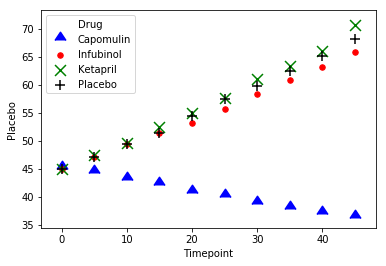

In [15]:
# focal drugs are Capomulin, Infubinol, Ketapril, and Placebo
ax = plt.gca()
table_to_flip_df.plot(kind='scatter',x='Timepoint',y='Capomulin',color ='blue',marker=10,s=120, label='Capomulin', ax=ax)
table_to_flip_df.plot(kind='scatter',x='Timepoint',y='Infubinol', color='red',marker='.',s=120,label='Infubinol', ax=ax)
table_to_flip_df.plot(kind='scatter',x='Timepoint',y='Ketapril', color='green',marker='x',s=120,label='Ketapril', ax=ax)
table_to_flip_df.plot(kind='scatter',x='Timepoint',y='Placebo', color='black',marker='+',s=120,label='Placebo', ax=ax)
plt.show()
ax.legend()


In [16]:
# now for error bars
Capomulin_SE_df=mean_and_SE_df.loc[mean_and_SE_df['Drug']=='Capomulin']
Infubinol_SE_df=mean_and_SE_df.loc[mean_and_SE_df['Drug']=='Infubinol']
Ketapril_SE_df=mean_and_SE_df.loc[mean_and_SE_df['Drug']=='Ketapril']
Placebo_SE_df=mean_and_SE_df.loc[mean_and_SE_df['Drug']=='Placebo']

Capomulin_SE_df.rename(columns={"mean tumor vol":"Capomulin_vol", "SE":"Capomulin_SE"}, inplace=True)
Capomulin_SE_df=Capomulin_SE_df.drop(["Drug"], axis=1)
Infubinol_SE_df.rename(columns={"mean tumor vol":"Infubinol_vol", "SE":"Infubinol_SE"}, inplace=True)
Infubinol_SE_df=Infubinol_SE_df.drop(["Drug"], axis=1)
Ketapril_SE_df.rename(columns={"mean tumor vol":"Ketapril_vol", "SE":"Ketapril_SE"}, inplace=True)
Ketapril_SE_df=Ketapril_SE_df.drop(["Drug"], axis=1)
Placebo_SE_df.rename(columns={"mean tumor vol":"Placebo_vol", "SE":"Placebo_SE"}, inplace=True)
Placebo_SE_df=Placebo_SE_df.drop(["Drug"], axis=1)




In [17]:
# FOR SOME REASON I CAN'T GET THE INDICES TO RESET, HENCE THE ERROR BARS AREN'T PLOTTING
# IT WORKED IN AN EARLIER VERSION, BUT I CAN'T SEE WHAT'S HGAPPENING DIFFERENTY HERE


Infubinol_SE_df=Infubinol_SE_df.reset_index()
Capomulin_SE_df=Capomulin_SE_df.reset_index()
Ketapril_SE_df=Ketapril_SE_df.reset_index()
Placebo_SE_df=Placebo_SE_df.reset_index()

In [18]:
Ketapril_SE_df

,index,Timepoint,Ketapril_vol,Ketapril_SE
0,30,0,45.000000,0.000000
1,31,5,47.389175,0.264819
2,32,10,49.582269,0.357421
3,33,15,52.399974,0.580268
4,34,20,54.920935,0.726484
5,35,25,57.678982,0.755413
6,36,30,60.994507,0.934121
7,37,35,63.371686,1.127867
8,38,40,66.068580,1.158449
9,39,45,70.662958,1.453186


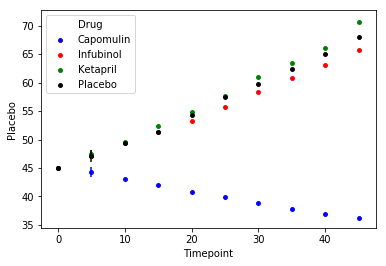

In [19]:
ax = plt.gca()
table_to_flip_df.plot(kind='scatter',x='Timepoint',y='Capomulin',color ='blue',marker=".",s=60, label='Capomulin',yerr=Capomulin_SE_df["Capomulin_SE"], ax=ax)
table_to_flip_df.plot(kind='scatter',x='Timepoint',y='Infubinol',color ='red',marker=".",s=60, label='Infubinol',yerr=Infubinol_SE_df["Infubinol_SE"], ax=ax)
table_to_flip_df.plot(kind='scatter',x='Timepoint',y='Ketapril',color ='green',marker=".",s=60, label='Ketapril',yerr=Ketapril_SE_df["Ketapril_SE"], ax=ax)
table_to_flip_df.plot(kind='scatter',x='Timepoint',y='Placebo',color ='black',marker=".",s=60, label='Placebo',yerr=Placebo_SE_df["Placebo_SE"], ax=ax)

plt.show()
ax.legend()

In [20]:
Placebo_SE_df

,index,Timepoint,Placebo_vol,Placebo_SE
0,50,0,45.000000,0.000000
1,51,5,47.125589,0.218091
2,52,10,49.423329,0.402064
3,53,15,51.359742,0.614461
4,54,20,54.364417,0.839609
5,55,25,57.482574,1.034872
6,56,30,59.809063,1.218231
7,57,35,62.420615,1.287481
8,58,40,65.052675,1.370634
9,59,45,68.084082,1.351726


In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint  
drug_by_time_tumor_ms_df=merged_mouse_trial_df.groupby(['Timepoint',"Drug"]).mean()
# Convert to DataFrame

revised_combined_mst=drug_by_time_tumor_ms_df.reset_index(level='Drug')
revised_combined_mst=revised_combined_mst.reset_index()
revised_combined_mst.sort_values(["Drug","Timepoint"], inplace=True, ascending=True) 
revised_combined_mst=revised_combined_mst.reset_index()
revised_combined_mst.rename(columns={"Metastatic Sites":"mean met site"}, inplace=True)
revised_combined_mst=revised_combined_mst.drop(["Tumor Volume (mm3)","index"], axis=1)

revised_combined_mst.head()
# Preview DataFrame

,Timepoint,Drug,mean met site
0,0,Capomulin,0.000000
1,5,Capomulin,0.160000
2,10,Capomulin,0.320000
3,15,Capomulin,0.375000
4,20,Capomulin,0.652174


In [22]:
# Store the std dev ms Data Grouped by Drug and Timepoint 
drug_by_time_ms_std_df=merged_mouse_trial_df.groupby(['Timepoint',"Drug"]).std()
# Convert to DataFrame

drug_by_time_ms_std_df=drug_by_time_tumor_std_df.reset_index(level='Drug')
drug_by_time_ms_std_df=drug_by_time_ms_std_df.reset_index()
drug_by_time_ms_std_df.sort_values(["Drug","Timepoint"], inplace=True, ascending=True) 
drug_by_time_ms_std_df=drug_by_time_ms_std_df.reset_index()
drug_by_time_ms_std_df=drug_by_time_ms_std_df.drop(["Tumor Volume (mm3)","index"], axis=1)
drug_by_time_ms_std_df.rename(columns={"Metastatic Sites":"std ms"}, inplace=True)


In [23]:
drug_by_time_ms_std_df.head()

,Timepoint,Drug,std ms
0,0,Capomulin,0.000000
1,5,Capomulin,0.374166
2,10,Capomulin,0.627163
3,15,Capomulin,0.646899
4,20,Capomulin,0.775107


In [24]:
# calculate srt(n) to use to get SE
drug_by_time_tumor_count_df=merged_mouse_trial_df.groupby(['Timepoint',"Drug"]).count()
# Convert to DataFrame

calculate_SE_ms_df=pd.merge(drug_by_time_ms_std_df, revised_combined_count, on=['Timepoint','Drug'], how='left')
calculate_SE_ms_df

calculate_SE_ms_df[['std ms','sqrt_n']] = calculate_SE_ms_df[['std ms','sqrt_n']].apply(pd.to_numeric)

calculate_SE_ms_df['SE']=calculate_SE_ms_df['std ms']/calculate_SE_ms_df['sqrt_n']

In [25]:
calculate_SE_ms_df.sort_values(["Drug","Timepoint"], inplace=True, ascending=True) 
calculate_SE_ms_df=calculate_SE_ms_df.reset_index()
calculate_SE_ms_df=calculate_SE_ms_df.drop(["std ms","sqrt_n", "index"], axis=1)
calculate_SE_ms_df.head()
revised_combined_mst.head()

,Timepoint,Drug,mean met site
0,0,Capomulin,0.000000
1,5,Capomulin,0.160000
2,10,Capomulin,0.320000
3,15,Capomulin,0.375000
4,20,Capomulin,0.652174


In [26]:
revised_combined_mst.head()

,Timepoint,Drug,mean met site
0,0,Capomulin,0.000000
1,5,Capomulin,0.160000
2,10,Capomulin,0.320000
3,15,Capomulin,0.375000
4,20,Capomulin,0.652174


In [27]:

ms_mean_and_SE_df=pd.merge(revised_combined_mst, calculate_SE_ms_df, on=['Timepoint','Drug'], how='left')

In [28]:
revised_combined_mst.head()

,Timepoint,Drug,mean met site
0,0,Capomulin,0.000000
1,5,Capomulin,0.160000
2,10,Capomulin,0.320000
3,15,Capomulin,0.375000
4,20,Capomulin,0.652174


In [29]:
calculate_SE_ms_df

,Timepoint,Drug,SE
0,0,Capomulin,0.000000
1,5,Capomulin,0.074833
2,10,Capomulin,0.125433
3,15,Capomulin,0.132048
4,20,Capomulin,0.161621
5,25,Capomulin,0.181818
6,30,Capomulin,0.172944
7,35,Capomulin,0.169496
8,40,Capomulin,0.175610
9,45,Capomulin,0.202591


In [30]:
ms_mean_and_SE_df.head()

,Timepoint,Drug,mean met site,SE
0,0,Capomulin,0.000000,0.000000
1,5,Capomulin,0.160000,0.074833
2,10,Capomulin,0.320000,0.125433
3,15,Capomulin,0.375000,0.132048
4,20,Capomulin,0.652174,0.161621


In [31]:
table_to_flip_ms_df=ms_mean_and_SE_df.drop(["SE"], axis=1)
table_to_flip_ms_df = table_to_flip_ms_df[['Drug', 'Timepoint', 'mean met site']]


In [32]:
table_to_flip_ms_df.head()

,Drug,Timepoint,mean met site
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [33]:
table_to_flip_ms_df=table_to_flip_ms_df.pivot(index='Timepoint', columns='Drug', values='mean met site')

In [34]:
table_to_flip_ms_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [35]:
table_to_flip_ms_df['Timepoint'] = table_to_flip_ms_df.index
table_to_flip_ms_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Timepoint
Timepoint,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667,5
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000,10
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524,15
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118,20
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500,25
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333,30
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714,35
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714,40


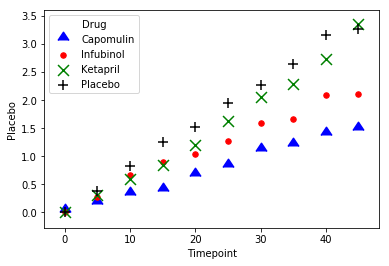

In [36]:
# focal drugs are Capomulin, Infubinol, Ketapril, and Placebo
ax = plt.gca()
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Capomulin',color ='blue',marker=10,s=120, label='Capomulin', ax=ax)
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Infubinol', color='red',marker='.',s=120,label='Infubinol', ax=ax)
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Ketapril', color='green',marker='x',s=120,label='Ketapril', ax=ax)
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Placebo', color='black',marker='+',s=120,label='Placebo', ax=ax)
plt.show()
ax.legend()

In [37]:
# now for error bars
Capomulin_ms_SE_df=ms_mean_and_SE_df.loc[ms_mean_and_SE_df['Drug']=='Capomulin']
Infubinol_ms_SE_df=ms_mean_and_SE_df.loc[ms_mean_and_SE_df['Drug']=='Infubinol']
Ketapril_ms_SE_df=ms_mean_and_SE_df.loc[ms_mean_and_SE_df['Drug']=='Ketapril']
Placebo_ms_SE_df=ms_mean_and_SE_df.loc[ms_mean_and_SE_df['Drug']=='Placebo']



Capomulin_ms_SE_df.rename(columns={"mean tumor vol":"Capomulin_vol", "SE":"Capomulin_SE"}, inplace=True)
Capomulin_ms_SE_df=Capomulin_ms_SE_df.drop(["Drug"], axis=1)
Infubinol_ms_SE_df.rename(columns={"mean tumor vol":"Infubinol_vol", "SE":"Infubinol_SE"}, inplace=True)
Infubinol_ms_SE_df=Infubinol_ms_SE_df.drop(["Drug"], axis=1)
Ketapril_ms_SE_df.rename(columns={"mean tumor vol":"Ketapril_vol", "SE":"Ketapril_SE"}, inplace=True)
Ketapril_ms_SE_df=Ketapril_ms_SE_df.drop(["Drug"], axis=1)
Placebo_ms_SE_df.rename(columns={"mean tumor vol":"Placebo_vol", "SE":"Placebo_SE"}, inplace=True)
Placebo_ms_SE_df=Placebo_ms_SE_df.drop(["Drug"], axis=1)



print(Capomulin_ms_SE_df)
print(Infubinol_ms_SE_df)
print(Ketapril_ms_SE_df)
print(Placebo_ms_SE_df)

   Timepoint  mean met site  Capomulin_SE
0          0       0.000000      0.000000
1          5       0.160000      0.074833
2         10       0.320000      0.125433
3         15       0.375000      0.132048
4         20       0.652174      0.161621
5         25       0.818182      0.181818
6         30       1.090909      0.172944
7         35       1.181818      0.169496
8         40       1.380952      0.175610
9         45       1.476190      0.202591
    Timepoint  mean met site  Infubinol_SE
20          0       0.000000      0.000000
21          5       0.280000      0.091652
22         10       0.666667      0.159364
23         15       0.904762      0.194015
24         20       1.050000      0.234801
25         25       1.277778      0.265753
26         30       1.588235      0.227823
27         35       1.666667      0.224733
28         40       2.100000      0.314466
29         45       2.111111      0.309320
    Timepoint  mean met site  Ketapril_SE
30          0       0.0

In [38]:
# AGAIN, SOMETHING WEIRD IS GOING ON WITH THE ERROR BARS NOT PLOTTING
#IT WORKED IN AN EARLIER VERSION AND I CAN'T FIND THE ISSUE HERE - FRUSTRATING

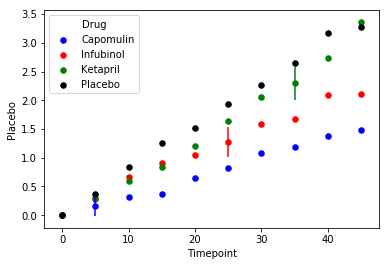

In [39]:
ax = plt.gca()
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Capomulin',color ='blue',marker=".",s=120, label='Capomulin',yerr=Capomulin_ms_SE_df["Capomulin_SE"], ax=ax)
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Infubinol',color ='red',marker=".",s=120, label='Infubinol',yerr=Infubinol_ms_SE_df["Infubinol_SE"], ax=ax)
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Ketapril',color ='green',marker=".",s=120, label='Ketapril',yerr=Ketapril_ms_SE_df["Ketapril_SE"], ax=ax)
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Placebo',color ='black',marker=".",s=120, label='Placebo',yerr=Placebo_ms_SE_df["Placebo_SE"], ax=ax)

plt.show()
ax.legend()

In [40]:
Placebo_ms_SE_df

,Timepoint,mean met site,Placebo_SE
50,0,0.000000,0.000000
51,5,0.375000,0.100947
52,10,0.833333,0.115261
53,15,1.250000,0.190221
54,20,1.526316,0.234064
55,25,1.941176,0.263888
56,30,2.266667,0.300264
57,35,2.642857,0.341412
58,40,3.166667,0.297294
59,45,3.272727,0.304240


In [41]:
#too crowded - going to do each vs placebo

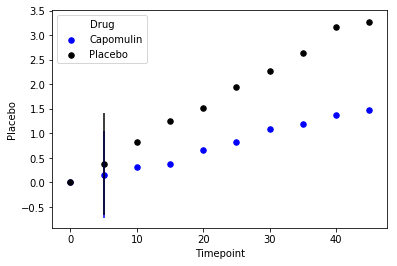

In [42]:
ax = plt.gca()
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Capomulin',color ='blue',marker=".",s=120, label='Capomulin',yerr=Capomulin_SE_df["Capomulin_SE"], ax=ax)
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Placebo',color ='black',marker=".",s=120, label='Placebo',yerr=Placebo_SE_df["Placebo_SE"], ax=ax)

plt.show()
ax.legend()

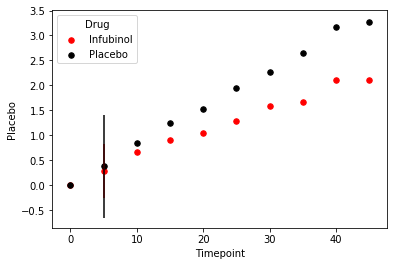

In [43]:
ax = plt.gca()
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Infubinol',color ='red',marker=".",s=120, label='Infubinol',yerr=Infubinol_SE_df["Infubinol_SE"], ax=ax)
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Placebo',color ='black',marker=".",s=120, label='Placebo',yerr=Placebo_SE_df["Placebo_SE"], ax=ax)

plt.show()
ax.legend()

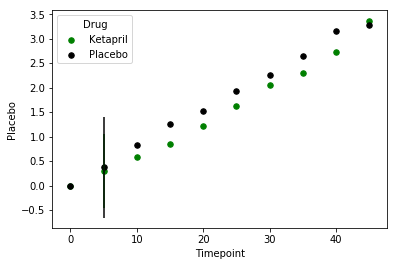

In [44]:
ax = plt.gca()
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Ketapril',color ='green',marker=".",s=120, label='Ketapril',yerr=Ketapril_SE_df["Ketapril_SE"], ax=ax)
table_to_flip_ms_df.plot(kind='scatter',x='Timepoint',y='Placebo',color ='black',marker=".",s=120, label='Placebo',yerr=Placebo_SE_df["Placebo_SE"], ax=ax)

plt.show()
ax.legend()

In [45]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_the_mice_df=merged_mouse_trial_df.groupby(['Timepoint',"Drug"]).count()

# Preview DataFrame
count_the_mice_df.head()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Timepoint Drug                                                     
0         Capomulin        25                  25                25
          Ceftamin         25                  25                25
          Infubinol        25                  25                25
          Ketapril         25                  25                25
          Naftisol         25                  25                25

In [46]:
count_the_mice_df.rename(columns={"Mouse ID":"mice remaining"}, inplace=True)
count_the_mice_df=count_the_mice_df.drop(["Tumor Volume (mm3)","Metastatic Sites"], axis=1)

In [47]:
count_the_mice_df=count_the_mice_df.reset_index(level='Drug')
count_the_mice_df=count_the_mice_df.reset_index()
count_the_mice_df.sort_values(["Drug","Timepoint"], inplace=True, ascending=True) 
count_the_mice_df=count_the_mice_df.reset_index()
count_the_mice_df.head()

,index,Timepoint,Drug,mice remaining
0,0,0,Capomulin,25
1,10,5,Capomulin,25
2,20,10,Capomulin,25
3,30,15,Capomulin,24
4,40,20,Capomulin,23


In [48]:
count_the_mice_df=count_the_mice_df.drop(["index"], axis=1)
count_the_mice_df.head()

,Timepoint,Drug,mice remaining
0,0,Capomulin,25
1,5,Capomulin,25
2,10,Capomulin,25
3,15,Capomulin,24
4,20,Capomulin,23


In [49]:
table_to_flip_mice_remaining_df=count_the_mice_df.pivot(index='Timepoint', columns='Drug', values='mice remaining')
table_to_flip_mice_remaining_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [50]:
table_to_flip_mice_remaining_df['Timepoint'] = table_to_flip_mice_remaining_df.index

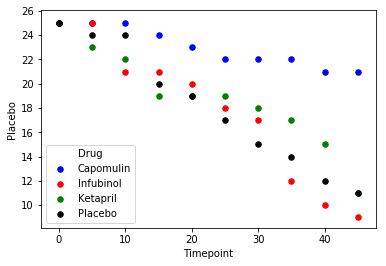

In [51]:
ax = plt.gca()

table_to_flip_mice_remaining_df.plot(kind='scatter',x='Timepoint',y='Capomulin',color ='blue',marker=".",s=120, label='Capomulin', ax=ax)
table_to_flip_mice_remaining_df.plot(kind='scatter',x='Timepoint',y='Infubinol',color ='red',marker=".",s=120, label='Infubinol', ax=ax)
table_to_flip_mice_remaining_df.plot(kind='scatter',x='Timepoint',y='Ketapril',color ='green',marker=".",s=120, label='Ketapril', ax=ax)
table_to_flip_mice_remaining_df.plot(kind='scatter',x='Timepoint',y='Placebo',color ='black',marker=".",s=120, label='Placebo', ax=ax)


plt.show()
ax.legend()

In [ ]:
# now do percent change in tumor volume

min_vol_df=merged_mouse_trial_df.groupby(["Drug"]).min()
max_vol_df=merged_mouse_trial_df.groupby(["Drug"]).max()

In [ ]:
min_vol_df.rename(columns={"Tumor Volume (mm3)":"min volume"}, inplace=True)
min_vol_df=min_vol_df.drop(["Mouse ID","Timepoint", "Metastatic Sites"], axis=1)

max_vol_df.rename(columns={"Tumor Volume (mm3)":"max volume"}, inplace=True)
max_vol_df=max_vol_df.drop(["Mouse ID","Timepoint", "Metastatic Sites"], axis=1)

In [ ]:

min_vol_df=min_vol_df.reset_index()
min_vol_df

In [ ]:

max_vol_df=max_vol_df.reset_index()
max_vol_df

In [ ]:
tumor_changed=pd.merge(max_vol_df, min_vol_df, on='Drug', how='left')
tumor_changed

In [ ]:
tumor_changed['chnage amount']=tumor_changed['max volume']/tumor_changed['min volume']


In [ ]:
tumor_changed['change percent']=tumor_changed['change amount']/tumor_changed['max volume']
# I know thi is wrong but I ran out of time - I should have looked at first and last values becaue volume could go up or down
# C'est la vie

In [ ]:
tumor_changed

In [ ]:
# writen description of three things about the data
# 1 - Capomulin susbtantively reduces tumor size while the other drugs are statistically no different than the placebo
# 2 - Infubinol and Capomulin both reduce the number of sites but Capomutin does so to a greater extent suggestung a combination of both is unliekly
# to be more effectize than Capomulin alone
# 3 - Infubinol underperforms that placebo near the end of the trial suggesting that by itself it has negatives that may outweight the posisitve impact on sites